In [10]:
import pyxdf
import numpy as np
import mne
from mne.datasets import misc
from mne.datasets import eegbci
from mne.channels import make_standard_montage

fname = "sub-P001_ses-S001_task-Default_run-001_eeg.xdf"
streams, header = pyxdf.load_xdf(fname)
data = streams[0]["time_series"].T
# assert data.shape[0] == 5  # four raw EEG plus one stim channel
# data[:4:2] -= data[1:4:2]  # subtract (rereference) to get two bipolar EEG
data = data[0:8,:]  # subselect
# data[:2] *= 1e-6 / 50 / 2  # uV -> V and preamp gain
egg_type = ['eeg'] *8
sfreq = float(streams[0]["info"]["nominal_srate"][0])
info = mne.create_info(8, sfreq, egg_type)
raw = mne.io.RawArray(data, info)
# raw.plot(scalings=dict(eeg=100e-6), duration=1, start=14)

Creating RawArray with float64 data, n_channels=8, n_times=18004
    Range : 0 ... 18003 =      0.000 ...    72.012 secs
Ready.


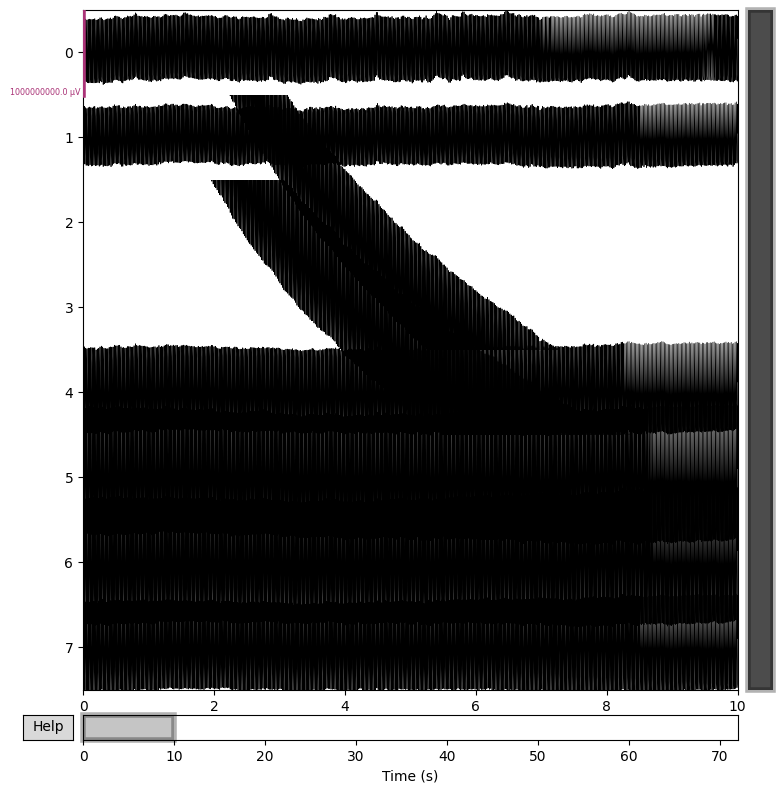

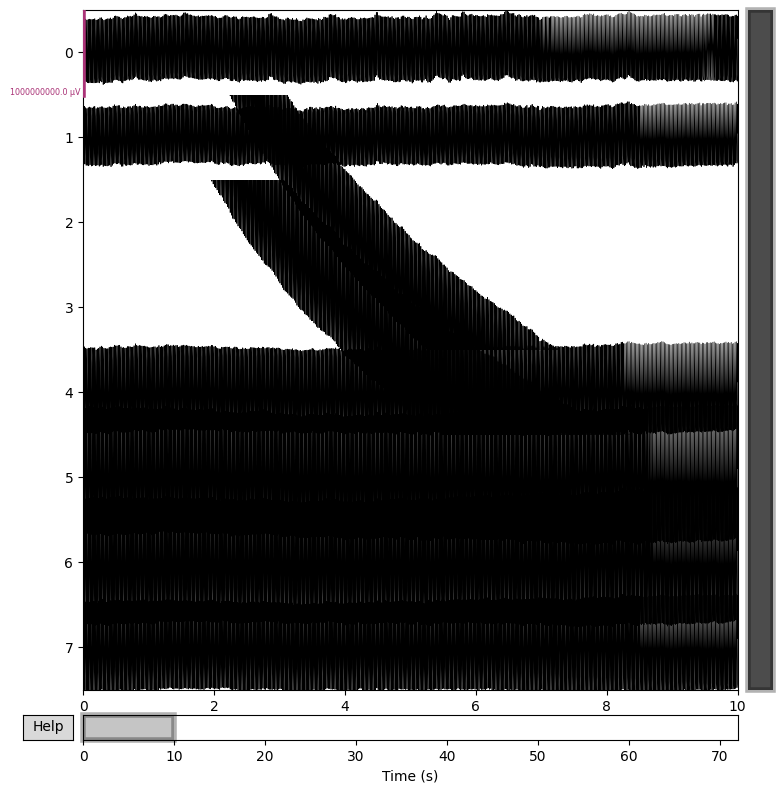

In [8]:
raw.plot(scalings = 500)

In [17]:
# eeg1 = raw_edf.copy().filter(l_freq=0.05, h_freq=3.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
eeg1 = raw.copy().filter(l_freq=0.1, h_freq=50.0, method = 'fir')
# eeg1 = eeg1.copy().filter(l_freq=0.0, h_freq=0.075, method = 'fir')
eeg1 = eeg1.copy().set_eeg_reference(ref_channels="average")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 8251 samples (33.004 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


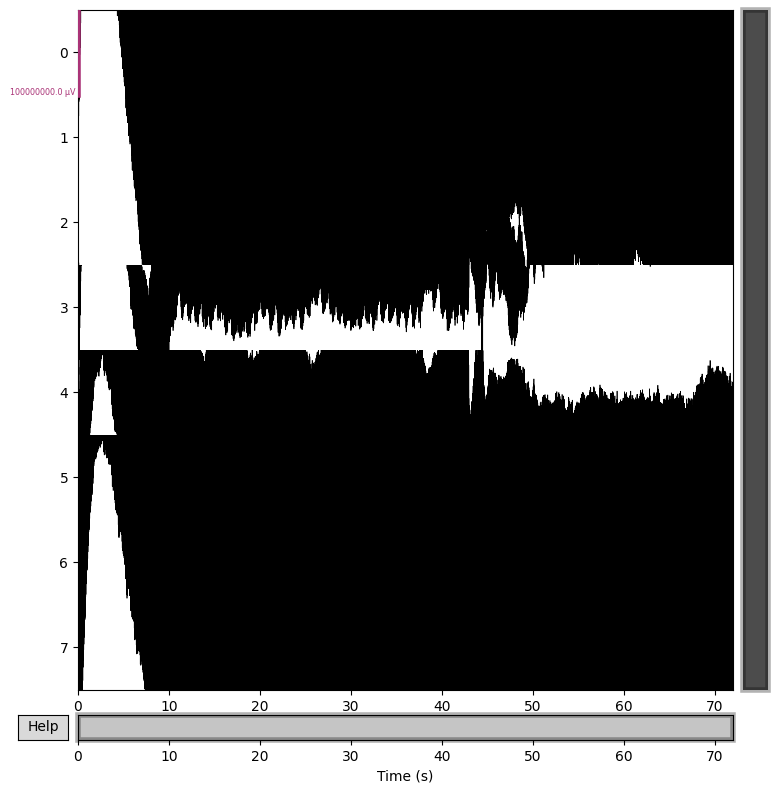

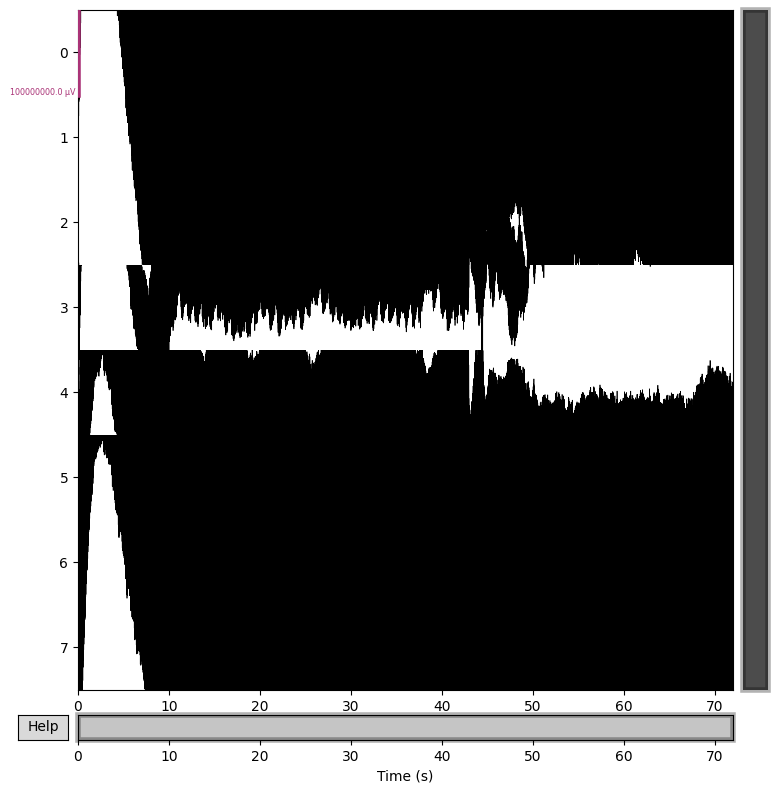

In [18]:
eeg1.plot(scalings = 50, duration=100)